In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Exploration:
* a. Load the dataset and perform exploratory data analysis (EDA).
* b. Examine the features, their types, and summary statistics.
* c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data


In [ ]:
# Load the datasets
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')

In [ ]:
train_df = train_data.copy()
test_df = test_data.copy()

In [ ]:
# Display the first few rows of the training dataset
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.shape

(891, 12)

In [ ]:
# Provides summary statistics for numerical features
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In above statistics we can see that the age and Fare table show the some statistical destribustion and presence of the outliers

**Exploratory Data Analysis (EDA).**

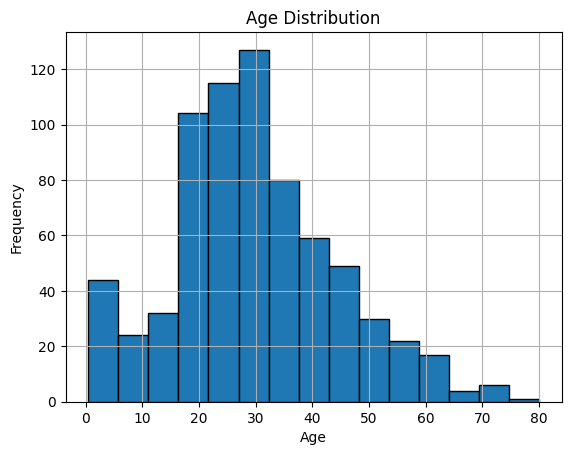

In [ ]:
# Histogram for Age
train_data['Age'].hist(bins=15, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We can see that Age column having the right skeewed data where very less number of people having age more than 60 are present creating outliers for the dataset.

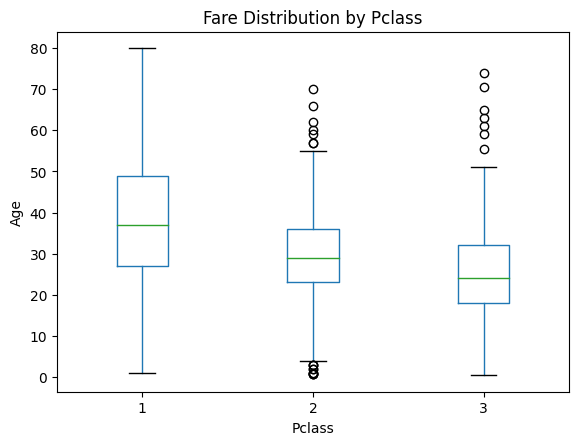

In [ ]:
  # Box plot for Fare
train_data.boxplot(column='Age', by='Pclass', grid=False)
plt.title('Fare Distribution by Pclass')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

We can see that older people are mostly present in the frist class.




<Axes: xlabel='Survived', ylabel='count'>

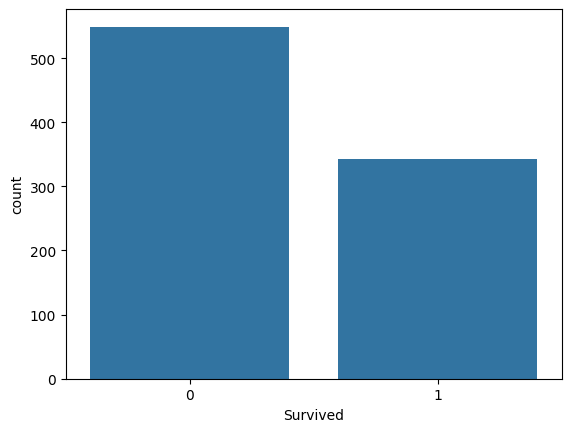

In [ ]:
sns.countplot(x='Survived',data=train_data)

we can clarly see that the number of people died in titanic accident is more than the number of people survived

<Axes: xlabel='Survived', ylabel='count'>

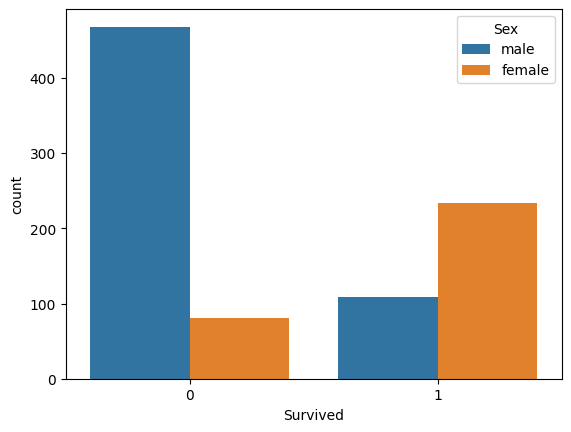

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

By above graph show that the number of female passanger suvived percentages is more than the male passanger

<Axes: xlabel='SibSp', ylabel='count'>

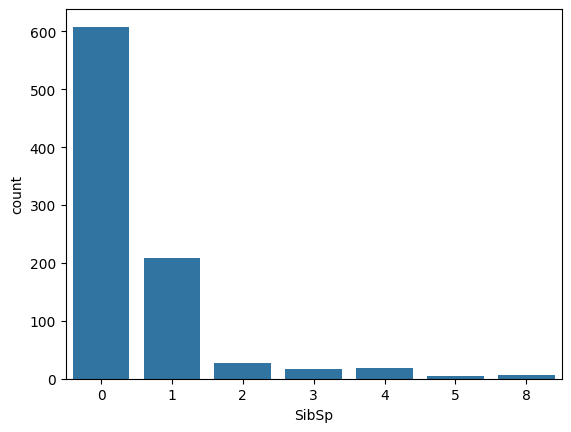

In [ ]:
sns.countplot(x='SibSp',data=train_data)

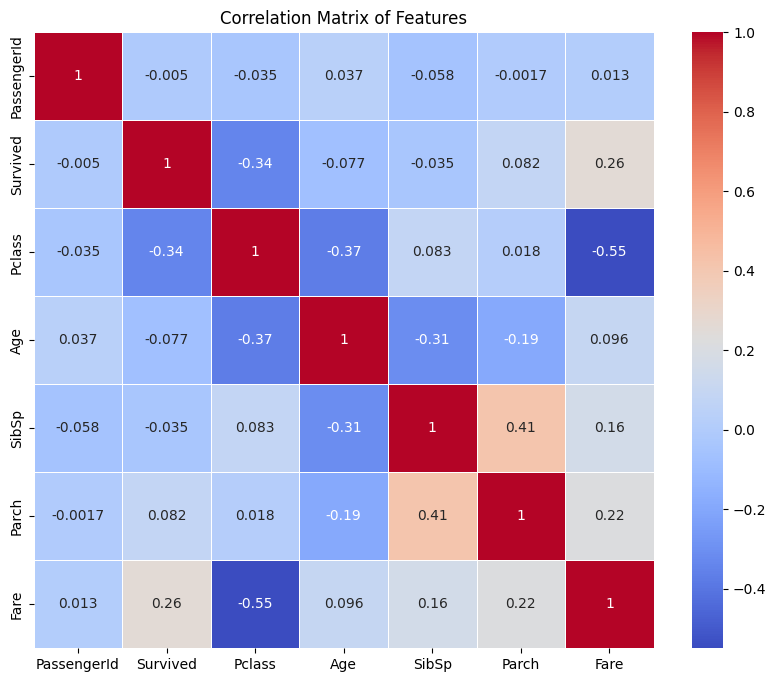

In [ ]:
numeric_df = train_data.select_dtypes(include=['float64', 'int64'])

#Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
#Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

by anaylysing the heatmap we can find the corralation in different features
* 1. PClass and Fare show the negative relation -0.55
* 2. SibSp and Parch show the highest positve realtion 0.42
* 3. and some other features also have modrate corrilation

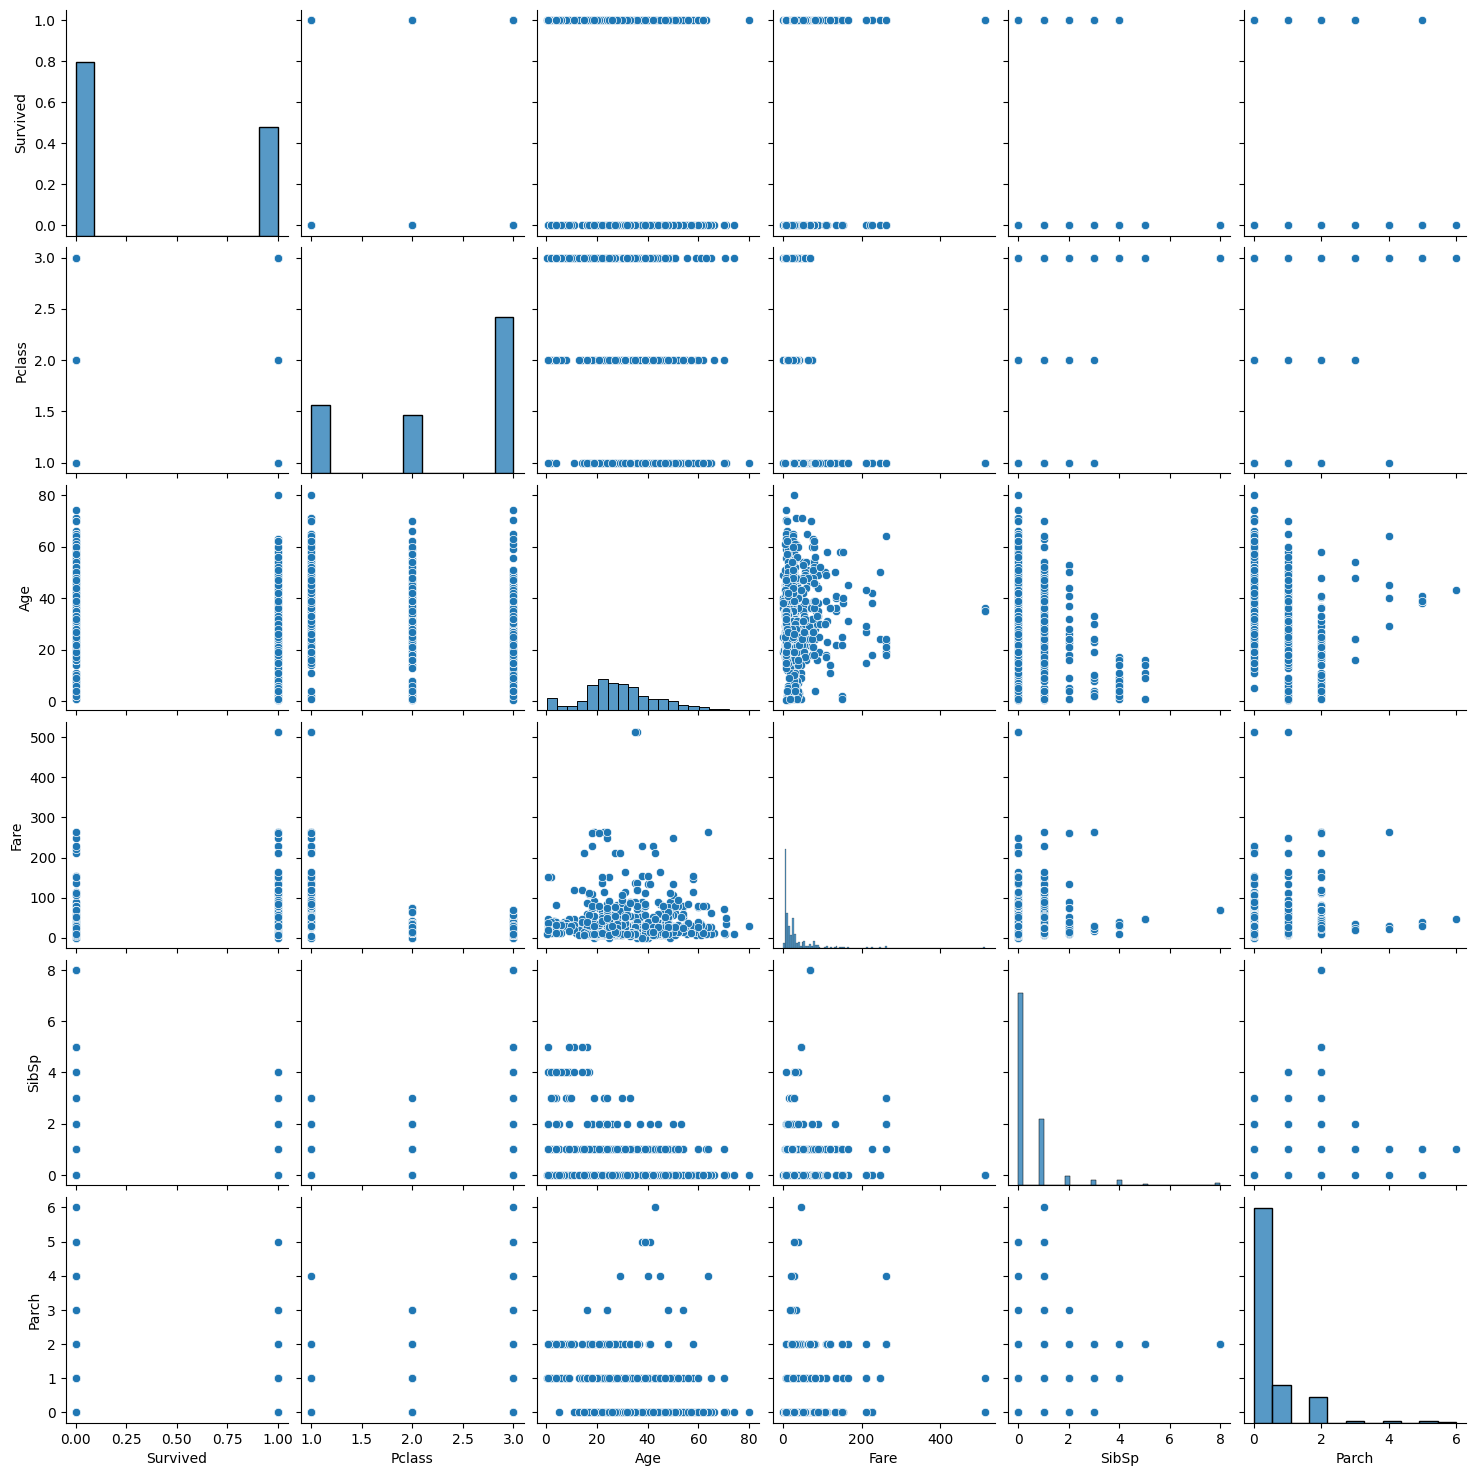

In [ ]:
# Pair plot for selected features
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

#2. Data Preprocessing:
* a. Handle missing values (e.g., imputation).
* b. Encode categorical variables.


In [ ]:
#calculate the missing values
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


we can see that column Age, Cabin and Embarked contains the massing values

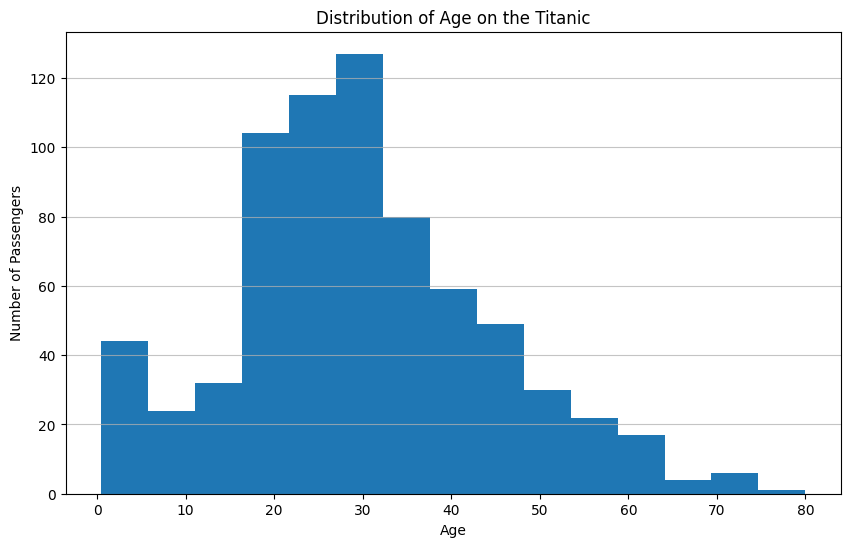

In [ ]:
# Plot the histogram for the 'Age' column to check the skweness and outliers present or not so we can choode appropriate method to fill the missing values
plt.figure(figsize=(10, 6))
plt.hist(train_df['Age'], bins=15)  # dropna() to ignore NaN values
plt.title('Distribution of Age on the Titanic')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', alpha=0.75)
plt.show()

Age columns show the right skewness so we have to use median value to fill the missing value since mean will possiblly show the biassness

In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

Cabin column have 687 measing values out of 897. Means almost 70% data is missed from the dataset so we can just deop this columns since it not add any value to our model

In [ ]:
train_df.drop(columns=['Cabin'], inplace=True)


In [ ]:
#Embarked clomns is categorical column so we have to replace with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


we can see that our new dataset contains zero missing values

Since our teating dataset is also the same as training data we can aaply same preprocessing method to it

In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [ ]:
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
# test_df.drop(columns=['Cabin'], inplace=True)
test_df['Fare'].fillna(test_df['Embarked'].mean(), inplace=True)

In [ ]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [ ]:
# Encode categorical variables for the test data
label_encoder = LabelEncoder()
test_df['Sex'] = label_encoder.fit_transform(test_df['Sex'])
test_df['Embarked'] = label_encoder.fit_transform(test_df['Embarked'])

# Task 3. Model Building:
* a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
* b. Train the model using the training data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Define features and target variable
X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train_df['Survived']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# 4. Model Evaluation:
* a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])

# confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Not Survived', 'Actual Survived'],
                               columns=['Predicted Not Survived', 'Predicted Survived'])

# Print the results
print(f"Accuracy: {accuracy}\n")
print("Confusion Matrix:")
print(conf_matrix_df)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.8100558659217877

Confusion Matrix:
                     Predicted Not Survived  Predicted Survived
Actual Not Survived                      90                  15
Actual Survived                          19                  55

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**Model Accuracy:** The model achieved an accuracy of 81%.

**Confusion Matrix Insights:**
* Correctly identified 90 instances of "Not Survived" and 55 instances of
"Survived."
* Misclassified 15 "Not Survived" as "Survived" and 19 "Survived" as "Not Survived."
**Classification Metrics:**

* Not Survived: Precision of 83%, Recall of 86%, and F1-Score of 84%.
* Survived: Precision of 79%, Recall of 74%, and F1-Score of 76%.
* Averages: The macro and weighted averages for precision, recall, and F1-score are around 80%, indicating a balanced performance across both classes.





In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
# Calculate ROC-AUC score
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.8823680823680824

**ROC-AUC Score of 0.88 Indicates strong model performance, with the ability to distinguish between "Not Survived" and "Survived" approximately 88% of the time.**

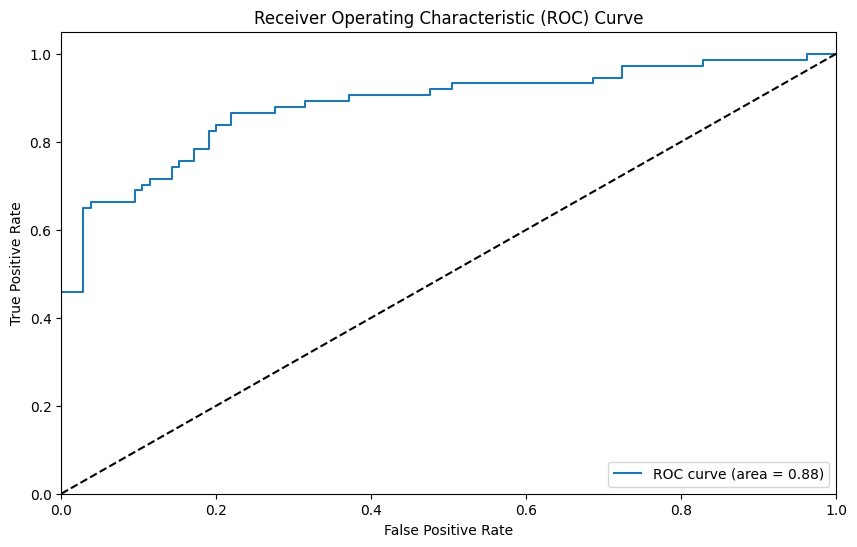

In [ ]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Select the same features from the test dataset that were used for training the model using the train dataset
X_test_df = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Make predictions on the test data
test_predictions = model.predict(X_test_df)


In [ ]:
test_df_predicted = test_df.copy()
test_df_predicted['Survived'] = test_predictions

In [ ]:
test_df_predicted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2,1


# Task 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).


In [ ]:
# Retrieve the coefficients and feature names
coefficients = model.coef_[0]
feature_names = X.columns

In [ ]:
# Create a DataFrame to display the feature names and their corresponding coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [ ]:
# Sort by absolute value of coefficients to see the most impactful features
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

In [ ]:
# Display the coefficients
coef_df[['Feature', 'Coefficient']]


,Feature,Coefficient
1,Sex,-2.596709
0,Pclass,-0.930727
3,SibSp,-0.293865
6,Embarked,-0.218848
4,Parch,-0.111821
2,Age,-0.030430
5,Fare,0.002533


* **Sex and Pclass** are the most significant predictors of survival, with females
and higher-class passengers having a better chance of surviving.
* **SibSp, Parch, Age, and Embarked** have smaller effects, with family size and age slightly decreasing survival chances.
* **Fare** shows higher-paying passengers had a slightly higher survival probability.

In [ ]:
import pickle

# Assuming your trained model is named 'model'
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)
